## How does social media platform usage vary across different age groups?


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Load the data
csv_path = r"C:\Users\alexj\Documents\AI Bootcamp\Project-1\Resources\smmh.csv"
df = pd.read_csv(csv_path)

# Display the first few rows
print("Data Preview:")
print(df.head())

# Print column names 
print("\nColumn Names:")
print(df.columns.tolist())


Data Preview:
            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use so

## Data Process

In [33]:
# Define the columns we need
age_column = '1. What is your age?'
platforms_column = '7. What social media platforms do you commonly use?'

# Check if the columns exist
if age_column in df.columns and platforms_column in df.columns:
    # Convert the column to string and fill NaNs with an empty string
    df[platforms_column] = df[platforms_column].astype(str).fillna('')

    # Split the platforms if they are listed in a single column as a string
    df[platforms_column] = df[platforms_column].str.split(', ')

    # Explode the lists into separate rows
    df_exploded = df.explode(platforms_column)

    # Clean up the platform names by stripping leading and trailing characters
    df_exploded[platforms_column] = df_exploded[platforms_column].str.replace(r"\\", "", regex=True).str.strip("[]'\" ")

    # Define age groups
    bins = [0, 18, 25, 35, 45, 55, 65, 100]
    labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_exploded['Age Group'] = pd.cut(df_exploded[age_column].astype(int), bins=bins, labels=labels, right=False)

    # Count the occurrences of each platform by age group
    platform_age_counts = df_exploded.groupby(['Age Group', platforms_column]).size().unstack().fillna(0)
    
    # Display the processed data
    display(platform_age_counts)
    
else:
    print(f"One or both columns '{age_column}' and '{platforms_column}' not found in the DataFrame.")


C:\Users\alexj\AppData\Local\Temp\ipykernel_11932\1375178245.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_age_counts = df_exploded.groupby(['Age Group', platforms_column]).size().unstack().fillna(0)


7. What social media platforms do you commonly use?,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
Age Group,,,,,,,,,
<18,11,7,16,7,6,5,4,4,15
18-24,159,270,258,101,90,154,72,87,272
25-34,20,68,52,21,22,15,12,14,63
35-44,4,21,7,3,4,2,0,5,19
45-54,2,37,25,12,3,4,5,20,38
55-64,1,2,0,1,1,0,0,1,3
65+,1,2,1,0,0,1,1,0,2


## Bar Plot // User Age Group Distribution Across Social Media Platforms

<Figure size 1400x800 with 0 Axes>

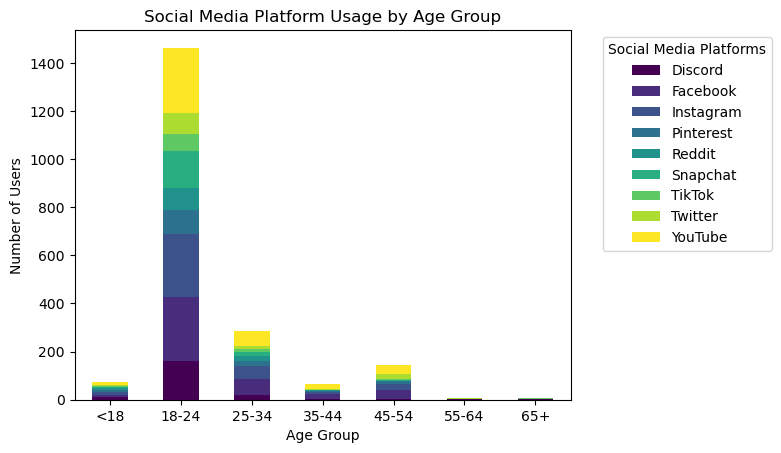

In [34]:
# Plot the data
plt.figure(figsize=(14, 8))
platform_age_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Social Media Platform Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Social Media Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


## Heat Map

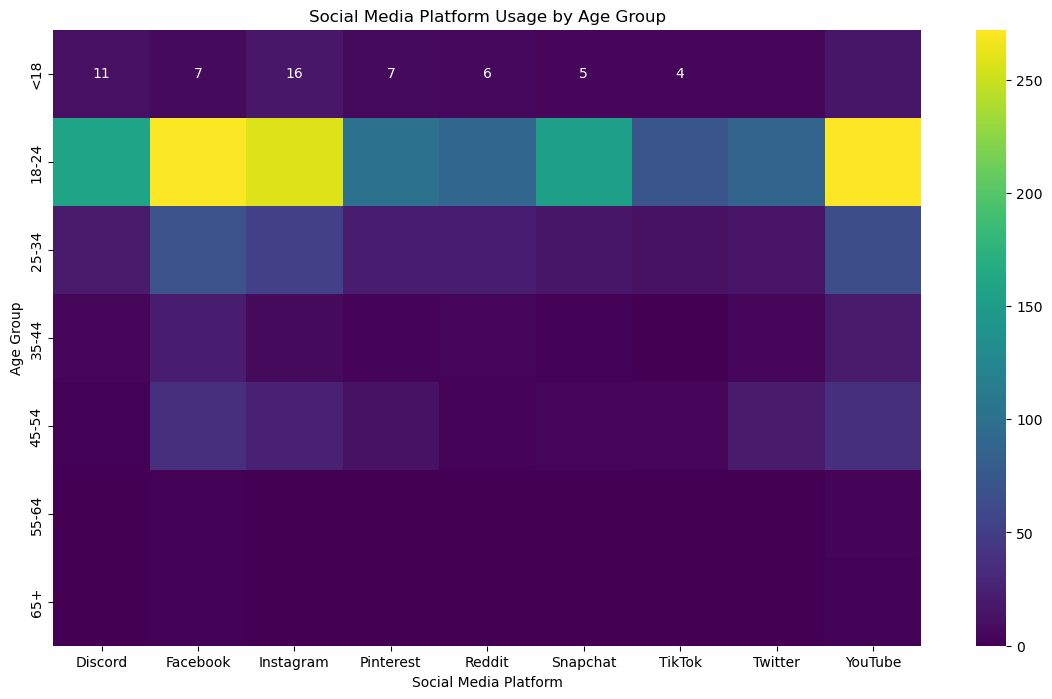

In [35]:
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(platform_age_counts, annot=True, fmt='g', cmap='viridis')
plt.title('Social Media Platform Usage by Age Group')
plt.xlabel('Social Media Platform')
plt.ylabel('Age Group')
plt.show()
